# Humpback Whale Identification Example

A solution example for Kaggle competition [Humpback Whale Identification](https://www.kaggle.com/c/humpback-whale-identification/).

This is LB 0.748, after training 100 epochs.

## Train model

In [1]:
! python train.py

Training app_whale_n1_k50_q1.
Samples = 13624, 2570
Begin training...
Epoch 68: 100%|█| 273/273 [01:33<00:00,  4.33s/it, loss=0.209, categorical_accuracy=0.936, val_1-shot_10-way_acc=0.999]


Epoch 100: 100%|█| 273/273 [01:33<00:00,  4.27s/it, loss=0.132, categorical_accuracy=0.96, val_1-shot_10-way_acc=1]
Finished.


## Calculate results

This step will do followings and save as .npy files.
- Calculate prototypes from training data.
- Calculate distances for each test samples how far from each class's prototypes.

In [3]:
from dlcliche.image import *
sys.path.append('..') # app
sys.path.append('../..') # root
from easydict import EasyDict
from app_utils_clf import *
from whale_utils import *
from config import DATA_PATH

weight = 'app_whale_n1_k50_q1_epoch100'
calculate_results(weight=weight, SZ=224, get_model_fn=get_resnet18, device=device,
                  train_csv=DATA_PATH+'/train.csv', data_train=DATA_PATH+'/train', data_test=DATA_PATH+'/test')

Training samples: 15697, # of labels: 5004.
Test samples: 7960.
Work in progress for app_whale_n1_k50_q1_epoch100...


100%|██████████| 246/246 [03:21<00:00,  1.22it/s]
2019-02-19 04:43:57,173 dlcliche.utils make_prototypes [INFO]: Making new prototypes.
100%|██████████| 7960/7960 [04:17<00:00, 30.90it/s]


## Visualize prototype distribution

PCA: Explained variance ratio: [0.08483911 0.07853024 0.06623912]


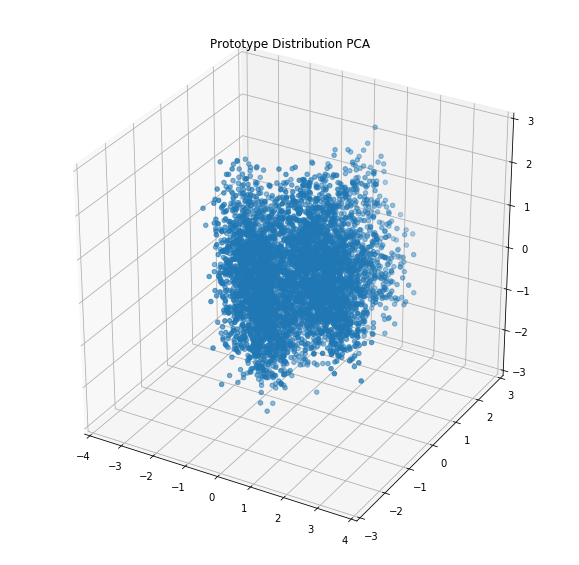

PCA: Explained variance ratio: [0.08483911 0.07853024]


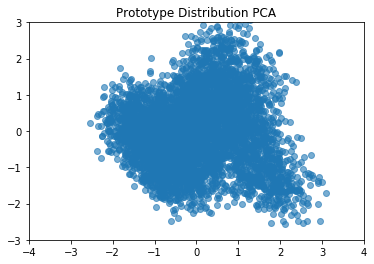

In [4]:
prototypes = np.load(f'prototypes_{weight}.npy')
X_pca = plot_prototype_3d_space_distribution(prototypes)
X_pca = plot_prototype_2d_space_distribution(prototypes)

## Make submission file

Adjust threshold so that it contains `new_whale` for 0.30 ~ 0.37 which depends on how much the test set would have `new_whale` you think.

In [19]:
test_dists = np.load(f'test_dists_{weight}.npy')
np_describe(test_dists)
prepare_submission(weight, test_dists, data_test=DATA_PATH+'/test',
                   classes=get_classes(data=DATA_PATH), new_whale_thresh=-1.85)

app_whale_n1_k50_q1_epoch100 0.3373115577889447 3146


,Image,Id
0,38f24831e.jpg,new_whale w_0135f5f w_659bdb8 w_6ab76e6 w_db4284b
1,131c8a098.jpg,new_whale w_5520ce2 w_8c6ad69 w_b4cf4b1 w_77f9c5f
2,02475f335.jpg,w_9c506f6 new_whale w_0135f5f w_0470377 w_db0c7fd
3,c6d20a222.jpg,w_789c969 new_whale w_9a9a2c8 w_91cdea4 w_98f2705
4,f4e3e117a.jpg,w_478d73b new_whale w_e3ced4e w_1ea5d96 w_f2dd08f


## Submit to Kaggle server

This resulted in LB 0.748.

In [20]:
submission_filename = weight
!kaggle competitions submit -c humpback-whale-identification -f subs/{submission_filename}.csv.gz -m "{submission_filename}"


100%|████████████████████████████████████████| 189k/189k [00:06<00:00, 31.5kB/s]
Successfully submitted to Humpback Whale Identification